In [59]:
%matplotlib inline

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_excel("/Users/kosmas/Desktop/Columbia_Data_Studio_Projects/data-studio-projects/Weekly projects/Fires_in Greece/DasikesPyrkagies2018v1.4.xlsx")
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,ΠΡΟΣΩΠΙΚΟ,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,ΟΧΗΜΑΤΑ,Unnamed: 24,Unnamed: 25,Unnamed: 26,ΕΝΑΕΡΙΑ,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΟΤΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,ΠΕΝΤΕΛΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,NaN,ΤΕΡΜΑ ΟΔΟΥ ΚΑΡΑΜΟΛΕΓΚΟΥ (ΕΝΑΝΤΙ ΠΥΡΟΦΥΛΑΚΕΙΟΥ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0
6,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-03-13 00:00:00,10:51,2018-03-13 00:00:00,13:40,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΛΑΚΚΕΣ ΔΡΟΣΟΠΗΓΗΣ,0,0.2,0,0,0,0,0,0,13,0,21,0,14,4,0,1,0,0,0,0,0,0
7,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-04-11 00:00:00,16:21,2018-04-11 00:00:00,17:15,ΠΑΡΝΗΘΑΣ,Δ. ΔΙΟΝΥΣΟΥ,ΚΡΥΟΝΕΡΙ,ΚΡΥΟΝΕΡΙ,0,0.8,0,0,0,0,0,0,10,0,12,0,0,3,0,0,0,0,0,0,0,0
8,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-07-25 00:00:00,15:50,2018-07-25 00:00:00,20:15,NaN,Δ. ΑΧΑΡΝΩΝ,ΘΡΑΚΟΜΑΚΕΔΟΝΕΣ,ΘΡΑΚΟΜΑΚΕΔΟΝΕΣ,0.5,0,0,0,0,0,0,0,9,0,0,0,0,3,0,0,0,0,0,0,0,0
9,6ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-09-01 00:00:00,22:29,2018-09-02 00:00:00,00:00,NaN,Δ. ΑΧΑΡΝΩΝ,ΑΧΑΡΝΑΙ,ΠΕΡΙΟΧΗ ΚΕΡΑΜΥΔΙΟΥ - ΠΑΡΝΗΘΑ,0,0.5,0,0,0,0,0,0,18,0,0,0,0,7,0,0,0,0,0,0,0,0


In [62]:
pd.set_option('display.max_columns', None)

In [63]:
df.dtypes

Unnamed: 0                       object
Unnamed: 1                       object
Unnamed: 2                       object
Unnamed: 3                       object
Unnamed: 4                       object
Unnamed: 5                       object
Unnamed: 6                       object
Unnamed: 7                       object
Unnamed: 8                       object
Unnamed: 9                       object
ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα)    object
Unnamed: 11                      object
Unnamed: 12                      object
Unnamed: 13                      object
Unnamed: 14                      object
Unnamed: 15                      object
Unnamed: 16                      object
Unnamed: 17                      object
ΠΡΟΣΩΠΙΚΟ                        object
Unnamed: 19                      object
Unnamed: 20                      object
Unnamed: 21                      object
Unnamed: 22                      object
ΟΧΗΜΑΤΑ                          object
Unnamed: 24                      object


In [64]:
df.shape

(8007, 32)

In [65]:
df = df.rename(index=str, columns={'Unnamed: 2': 'Ημερνία_Εναρξης',
                                   'Unnamed: 4': 'Ημερνια_Κατασβεσης',
                                   'Unnamed: 0': 'Υρεσια',
                                   'Unnamed: 1': 'Νομός',
                                   'Unnamed: 3': 'ωρα_Έναρξης',
                                   'Unnamed: 5': 'ωρα_Κατάσβεσης',
                                   'ΚΑΜΜΕΝΗ ΕΚΤΑΣΗ (Σε Στρέμματα)': 'Καμμένες_Εκτάσεις',
                                   'Unnamed: 11': 'Δασική_Έκταση', 
                                   'Unnamed: 12': 'Άλση', 
                                   'Unnamed: 13': 'Χορτκές_Εκτάσεις',
                                   'Unnamed: 14': 'Καλάμια_Βάλτοι', 
                                   'Unnamed: 15': 'Γεωργικές_Εκτάσεις', 
                                   'Unnamed: 16': 'Υπολλείματα_Καλλιεργειών', 
                                   'Unnamed: 17': 'Σκουπιδότοποι',
                                   'ΠΡΟΣΩΠΙΚΟ': 'ΠΥΡΟΣ_ΣΩΜΑ',
                                   'Unnamed: 19': 'ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ',
                                   'Unnamed: 20': 'ΕΘΕΛΟ_ΝΤΕΣ',
                                   'Unnamed: 21': 'ΣΤΡΑΤΟΣ',
                                   'Unnamed: 22': 'ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ',
                                   'ΟΧΗΜΑΤΑ': 'ΠΥΡΟΣ_ΟΧΗΜ',
                                   'Unnamed: 24': 'ΟΧΗΜ_ΟΤΑ',
                                   'Unnamed: 25': 'ΒΥΤΙΟ_ΦΟΡΑ',
                                   'Unnamed: 26': 'ΜΗΧΑΝΗ_ΜΑΤΑ',
                                   'ΕΝΑΕΡΙΑ': 'ΕΛΙΚΟ_ΠΤΕΡΑ',
                                   'Unnamed: 28': 'Α_Φ_CL415',
                                   'Unnamed: 29': 'Α_Φ_CL215',
                                   'Unnamed: 30': 'Α_Φ_PZL',
                                   'Unnamed: 31': 'Α_Φ_GRU'})
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
0,Υπηρεσία,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δασαρχείο,Δήμος,Περιοχή,Διεύθυνση,Δάση,Δασική Έκταση,Άλση,Χορτ/κές Εκτάσεις,Καλάμια - Βάλτοι,Γεωργικές Εκτάσεις,Υπολλείματα Καλλιεργειών,Σκουπι-δότοποι,ΠΥΡΟΣ. ΣΩΜΑ,ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ,ΕΘΕΛΟ-ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ. ΟΧΗΜ.,ΟΧΗΜ. ΟΤΑ,ΒΥΤΙΟ- ΦΟΡΑ,ΜΗΧΑΝΗ-ΜΑΤΑ,ΕΛΙΚΟ- ΠΤΕΡΑ,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0


In [66]:
df.dtypes

Υρεσια                      object
Νομός                       object
Ημερνία_Εναρξης             object
ωρα_Έναρξης                 object
Ημερνια_Κατασβεσης          object
ωρα_Κατάσβεσης              object
Unnamed: 6                  object
Unnamed: 7                  object
Unnamed: 8                  object
Unnamed: 9                  object
Καμμένες_Εκτάσεις           object
Δασική_Έκταση               object
Άλση                        object
Χορτκές_Εκτάσεις            object
Καλάμια_Βάλτοι              object
Γεωργικές_Εκτάσεις          object
Υπολλείματα_Καλλιεργειών    object
Σκουπιδότοποι               object
ΠΥΡΟΣ_ΣΩΜΑ                  object
ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ            object
ΕΘΕΛΟ_ΝΤΕΣ                  object
ΣΤΡΑΤΟΣ                     object
ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ              object
ΠΥΡΟΣ_ΟΧΗΜ                  object
ΟΧΗΜ_ΟΤΑ                    object
ΒΥΤΙΟ_ΦΟΡΑ                  object
ΜΗΧΑΝΗ_ΜΑΤΑ                 object
ΕΛΙΚΟ_ΠΤΕΡΑ                 object
Α_Φ_CL415           

In [67]:
df = df.drop(['0'])

In [68]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,NaN,Δ. ΩΡΩΠΟΥ,NaN,ΘΕΣΗ ΚΑΚΩΣΙ - ΒΛΑΣΤΟΣ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΟΛΥΜΠΙΚΑΣ Κ' ΔΕΞΑΜΕΝΗΣ ΑΝΩ ΠΑΝΟΡΑΜΑ-ΑΓ.ΑΠΟΣΤ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,NaN,Δ. ΩΡΩΠΟΥ,ΑΦΙΔΝΕΣ,ΑΦΙΔΝΑΙ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,NaN,Δ. ΩΡΩΠΟΥ,ΚΑΛΑΜΟΣ,ΘΕΣΗ ΑΓΙΑ ΤΡΙΑΔΑ-ΟΔΟΣ ΑΓΙΑΣ ΤΡΙΑΔΑΣ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,ΠΕΝΤΕΛΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,NaN,ΤΕΡΜΑ ΟΔΟΥ ΚΑΡΑΜΟΛΕΓΚΟΥ (ΕΝΑΝΤΙ ΠΥΡΟΦΥΛΑΚΕΙΟΥ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0


In [69]:
df.shape

(8006, 32)

In [70]:
df = df.drop(columns=['Unnamed: 6','Unnamed: 8', 'Unnamed: 9'])

In [71]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0


In [72]:
df.shape

(8006, 29)

In [73]:
df = df.dropna()

In [74]:
df.shape

(6691, 29)

In [75]:
df['start_daytime'] = df['Ημερνία_Εναρξης'].map(str) + df['ωρα_Έναρξης']
df['end_daytime'] = df['Ημερνια_Κατασβεσης'].map(str) + df['ωρα_Κατάσβεσης']

In [76]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 00:00:0012:06,2018-05-29 00:00:0018:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 00:00:0019:00,2018-07-31 00:00:0010:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 00:00:0015:30,2018-08-27 00:00:0007:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 00:00:0020:10,2018-11-08 00:00:0021:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 00:00:0017:36,2018-05-23 00:00:0018:10


In [77]:
df['start_daytime'] = df['start_daytime'].str.replace('00:00:00', '')
df['end_daytime'] = df['end_daytime'].str.replace('00:00:00', '')


In [78]:
df.head()

,Υρεσια,Νομός,Ημερνία_Εναρξης,ωρα_Έναρξης,Ημερνια_Κατασβεσης,ωρα_Κατάσβεσης,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-05-29 00:00:00,12:06,2018-05-29 00:00:00,18:30,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06,2018-05-29 18:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-07-23 00:00:00,19:00,2018-07-31 00:00:00,10:18,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00,2018-07-31 10:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-08-26 00:00:00,15:30,2018-08-27 00:00:00,07:55,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30,2018-08-27 07:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,2018-11-07 00:00:00,20:10,2018-11-08 00:00:00,21:10,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10,2018-11-08 21:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,2018-05-23 00:00:00,17:36,2018-05-23 00:00:00,18:10,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36,2018-05-23 18:10


In [79]:
df = df.drop(columns=['Ημερνία_Εναρξης','ωρα_Έναρξης', 'Ημερνια_Κατασβεσης', 'ωρα_Κατάσβεσης'])
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06,2018-05-29 18:30
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00,2018-07-31 10:18
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0.1,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30,2018-08-27 07:55
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1.5,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10,2018-11-08 21:10
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36,2018-05-23 18:10


In [80]:
df['start_daytime'] = pd.to_datetime(df['start_daytime'])
df['end_daytime'] = pd.to_datetime(df['end_daytime'])



In [81]:
df['Καμμένες_Εκτάσεις'] = df['Καμμένες_Εκτάσεις'].astype(int)
df['Δασική_Έκταση'] = df['Δασική_Έκταση'].astype(int)
df['Άλση'] = df['Άλση'].astype(int)
df['Χορτκές_Εκτάσεις'] = df['Χορτκές_Εκτάσεις'].astype(int)
df['Καλάμια_Βάλτοι'] = df['Καλάμια_Βάλτοι'].astype(int)
df['Γεωργικές_Εκτάσεις'] = df['Γεωργικές_Εκτάσεις'].astype(int)
df['Υπολλείματα_Καλλιεργειών'] = df['Υπολλείματα_Καλλιεργειών'].astype(int)
df['Σκουπιδότοποι'] = df['Σκουπιδότοποι'].astype(int)
df['ΠΥΡΟΣ_ΣΩΜΑ'] = df['ΠΥΡΟΣ_ΣΩΜΑ'].astype(int)
df['ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ'] = df['ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ'].astype(int)
df['ΕΘΕΛΟ_ΝΤΕΣ'] = df['ΕΘΕΛΟ_ΝΤΕΣ'].astype(int)
df['ΣΤΡΑΤΟΣ'] = df['ΣΤΡΑΤΟΣ'].astype(int)
df['ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ'] = df['ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ'].astype(int)
df['ΠΥΡΟΣ_ΟΧΗΜ'] = df['ΠΥΡΟΣ_ΟΧΗΜ'].astype(int)
df['ΟΧΗΜ_ΟΤΑ'] = df['ΟΧΗΜ_ΟΤΑ'].astype(int)
df['ΒΥΤΙΟ_ΦΟΡΑ'] = df['ΒΥΤΙΟ_ΦΟΡΑ'].astype(int)
df['ΜΗΧΑΝΗ_ΜΑΤΑ'] = df['ΜΗΧΑΝΗ_ΜΑΤΑ'].astype(int)
df['ΕΛΙΚΟ_ΠΤΕΡΑ'] = df['ΕΛΙΚΟ_ΠΤΕΡΑ'].astype(int)
df['ΜΗΧΑΝΗ_ΜΑΤΑ'] = df['ΜΗΧΑΝΗ_ΜΑΤΑ'].astype(int)
df['Α_Φ_CL415'] = df['Α_Φ_CL415'].astype(int)
df['Α_Φ_CL215'] = df['Α_Φ_CL215'].astype(int)
df['Α_Φ_PZL'] = df['Α_Φ_PZL'].astype(int)
df['Α_Φ_GRU'] = df['Α_Φ_GRU'].astype(int)       

In [82]:
df.dtypes

Υρεσια                              object
Νομός                               object
Unnamed: 7                          object
Καμμένες_Εκτάσεις                    int64
Δασική_Έκταση                        int64
Άλση                                 int64
Χορτκές_Εκτάσεις                     int64
Καλάμια_Βάλτοι                       int64
Γεωργικές_Εκτάσεις                   int64
Υπολλείματα_Καλλιεργειών             int64
Σκουπιδότοποι                        int64
ΠΥΡΟΣ_ΣΩΜΑ                           int64
ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ                     int64
ΕΘΕΛΟ_ΝΤΕΣ                           int64
ΣΤΡΑΤΟΣ                              int64
ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ                       int64
ΠΥΡΟΣ_ΟΧΗΜ                           int64
ΟΧΗΜ_ΟΤΑ                             int64
ΒΥΤΙΟ_ΦΟΡΑ                           int64
ΜΗΧΑΝΗ_ΜΑΤΑ                          int64
ΕΛΙΚΟ_ΠΤΕΡΑ                          int64
Α_Φ_CL415                            int64
Α_Φ_CL215                            int64
Α_Φ_PZL    

In [83]:
df['difference'] = df.end_daytime - df.start_daytime
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00


In [84]:
df['wait_days'] = df['difference'].dt.components['days'] + \
                  df['difference'].dt.components['hours'] / 24
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference,wait_days
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000


In [85]:
df['total_burned_acres'] = df.apply(lambda row: row.Καμμένες_Εκτάσεις +
                                 row.Δασική_Έκταση + 
                                 row.Άλση + 
                                 row.Χορτκές_Εκτάσεις + 
                                 row.Καλάμια_Βάλτοι + 
                                 row.Γεωργικές_Εκτάσεις + 
                                 row.Υπολλείματα_Καλλιεργειών + 
                                 row.Σκουπιδότοποι, axis=1)

In [86]:
df.head()

,Υρεσια,Νομός,Unnamed: 7,Καμμένες_Εκτάσεις,Δασική_Έκταση,Άλση,Χορτκές_Εκτάσεις,Καλάμια_Βάλτοι,Γεωργικές_Εκτάσεις,Υπολλείματα_Καλλιεργειών,Σκουπιδότοποι,ΠΥΡΟΣ_ΣΩΜΑ,ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ,ΕΘΕΛΟ_ΝΤΕΣ,ΣΤΡΑΤΟΣ,ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ,ΠΥΡΟΣ_ΟΧΗΜ,ΟΧΗΜ_ΟΤΑ,ΒΥΤΙΟ_ΦΟΡΑ,ΜΗΧΑΝΗ_ΜΑΤΑ,ΕΛΙΚΟ_ΠΤΕΡΑ,Α_Φ_CL415,Α_Φ_CL215,Α_Φ_PZL,Α_Φ_GRU,start_daytime,end_daytime,difference,wait_days,total_burned_acres
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10


In [87]:
df.shape

(6691, 30)

In [88]:
df = df.rename(index=str, columns={'Υρεσια': 'Fire_department',
                                   'Νομός': 'region',
                                   'Unnamed: 7': 'borough',
                                   'Καμμένες_Εκτάσεις':'burned_forests1',
                                   'Δασική_Έκταση':'burned_forests2', 
                                   'Άλση':'burned_forests3', 
                                   'Χορτκές_Εκτάσεις':'burned_fields',
                                   'Καλάμια_Βάλτοι':'burned_swamp', 
                                   'Γεωργικές_Εκτάσεις':'burned_Agricultural', 
                                   'Υπολλείματα_Καλλιεργειών':'burned_Agricultural2', 
                                   'Σκουπιδότοποι':'burned_garbage_disposal_sites',
                                   'ΠΥΡΟΣ_ΣΩΜΑ':'firefighters',
                                   'ΠΕΖΟΠΟΡΑ_ΤΜΗΜΑΤΑ':'firefighters2',
                                   'ΕΘΕΛΟ_ΝΤΕΣ':'volunt_firefighters',
                                   'ΣΤΡΑΤΟΣ':'military_forces',
                                   'ΑΛΛΕΣ_ΔΥΝΑΜΕΙΣ':'other_forces',
                                   'ΠΥΡΟΣ_ΟΧΗΜ':'Fire_trucks',
                                   'ΟΧΗΜ_ΟΤΑ':'other_fire_vehicles',
                                   'ΒΥΤΙΟ_ΦΟΡΑ':'fire_tankers',
                                   'ΜΗΧΑΝΗ_ΜΑΤΑ':'fire_equipent',
                                   'ΕΛΙΚΟ_ΠΤΕΡΑ':'helicopters',
                                   'Α_Φ_CL415':'fire_plane_type1',
                                   'Α_Φ_CL215':'fire_plane_type2',
                                   'Α_Φ_PZL':'fire_plane_type3',
                                   'Α_Φ_GRU':'fire_plane_type4'})
df.head()

,Fire_department,region,borough,burned_forests1,burned_forests2,burned_forests3,burned_fields,burned_swamp,burned_Agricultural,burned_Agricultural2,burned_garbage_disposal_sites,firefighters,firefighters2,volunt_firefighters,military_forces,other_forces,Fire_trucks,other_fire_vehicles,fire_tankers,fire_equipent,helicopters,fire_plane_type1,fire_plane_type2,fire_plane_type3,fire_plane_type4,start_daytime,end_daytime,difference,wait_days,total_burned_acres
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10


In [89]:
df.shape

(6691, 30)

In [90]:
df['total_firefight_personnel'] = df.apply(lambda row: row.firefighters + row.firefighters2 + row.volunt_firefighters + row.military_forces + row.other_forces , axis=1)
df['total_terrestrial_forces'] = df.apply(lambda row: row.Fire_trucks + row.other_fire_vehicles + row.fire_tankers + row.fire_equipent, axis=1)
df['total_aerial_forces'] = df.apply(lambda row: row.helicopters + row.fire_plane_type1 + row.fire_plane_type2 + row.fire_plane_type3 + row.fire_plane_type4, axis=1)


In [91]:
df.head()

,Fire_department,region,borough,burned_forests1,burned_forests2,burned_forests3,burned_fields,burned_swamp,burned_Agricultural,burned_Agricultural2,burned_garbage_disposal_sites,firefighters,firefighters2,volunt_firefighters,military_forces,other_forces,Fire_trucks,other_fire_vehicles,fire_tankers,fire_equipent,helicopters,fire_plane_type1,fire_plane_type2,fire_plane_type3,fire_plane_type4,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,3,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00,0.250000,3,8,2,0
2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,150,0,150,0,350,0,0,21,6,30,0,12,7,15,2,0,0,1,0,0,0,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00,7.625000,650,69,24,1
3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,0,0,15,1,26,0,0,4,0,0,0,0,1,0,0,0,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00,0.666667,0,42,4,1
4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,0,0,0,0,0,0,1,0,6,0,12,0,5,3,6,1,2,0,0,0,0,0,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00,1.041667,1,23,12,0
5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,0,10,0,0,0,0,0,0,13,0,10,0,0,5,4,0,0,0,0,0,0,0,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00,0.000000,10,23,9,0


In [92]:
df.shape

(6691, 33)

In [93]:
df = df.drop(columns=['burned_forests1',
                      'burned_forests2', 
                      'burned_forests3', 
                      'burned_fields',
                      'burned_swamp',
                      'burned_Agricultural',
                      'burned_Agricultural2',
                      'burned_garbage_disposal_sites',
                      'firefighters',
                      'firefighters2',
                      'volunt_firefighters',
                      'military_forces',
                      'other_forces', 
                      'Fire_trucks',
                      'other_fire_vehicles',
                      'fire_tankers',
                      'fire_equipent',
                      'helicopters',
                      'fire_plane_type1', 
                      'fire_plane_type2',
                      'fire_plane_type3',
                      'fire_plane_type4'])

In [94]:
df.to_csv('data_fire_final.csv')

## This is my final dataframe
### After i add ΑΤΤΙΚΗΣ, Δ.ΑΤΤΙΚΗΣ, ΑΝ.ΑΤΤΙΚΗΣ

In [95]:
df2 = pd.read_csv('/Users/kosmas/Desktop/Columbia_Data_Studio_Projects/data-studio-projects/Weekly projects/Fires_in Greece/data_fire_final_2.csv')
df2.head()

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
0,1,Π.Κ. ΚΑΛΑΜΟΥ,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-05-29 12:06:00,2018-05-29 18:30:00,0 days 06:24:00.000000000,0.250000,3,8,2,0
1,2,Π.Κ. ΚΑΛΑΜΟΥ,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-07-23 19:00:00,2018-07-31 10:18:00,7 days 15:18:00.000000000,7.625000,650,69,24,1
2,3,Π.Κ. ΚΑΛΑΜΟΥ,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-08-26 15:30:00,2018-08-27 07:55:00,0 days 16:25:00.000000000,0.666667,0,42,4,1
3,4,Π.Κ. ΚΑΛΑΜΟΥ,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΩΡΩΠΟΥ,2018-11-07 20:10:00,2018-11-08 21:10:00,1 days 01:00:00.000000000,1.041667,1,23,12,0
4,5,1ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΚΑΙΣΑΡΙΑΝΗΣ,2018-05-23 17:36:00,2018-05-23 18:10:00,0 days 00:34:00.000000000,0.000000,10,23,9,0


## Total number of fires per region

In [96]:
df2.region.value_counts()

ΛΑΡΙΣΑΣ                     519
ΜΕΣΣΗΝΙΑΣ                   450
ΗΛΕΙΑΣ                      425
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ            293
ΑΧΑΙΑΣ                      264
ΚΙΛΚΙΣ                      260
ΡΟΔΟΠΗΣ                     249
ΚΑΡΔΙΤΣΑΣ                   217
ΠΕΛΛΑΣ                      211
ΗΡΑΚΛΕΙΟΥ                   211
ΘΕΣΣΑΛΟΝΙΚΗΣ                198
ΕΥΒΟΙΑΣ                     195
ΕΒΡΟΥ                       180
ΚΕΡΚΥΡΑΣ                    170
ΚΑΒΑΛΑΣ                     160
ΚΕΦΑΛΛΟΝΙΑΣ                 140
ΛΑΚΩΝΙΑΣ                    137
ΠΙΕΡΙΑΣ                     130
ΗΜΑΘΙΑΣ                     128
ΑΡΤΑΣ                       117
ΞΑΝΘΗΣ                      115
ΑΡΚΑΔΙΑΣ                    113
ΡΕΘΥΜΝΟΥ                    109
ΔΡΑΜΑΣ                      105
ΒΟΙΩΤΙΑΣ                    102
ΦΘΙΩΤΙΔΑΣ                    99
ΛΕΣΒΟΥ                       94
ΜΑΓΝΗΣΙΑΣ                    93
ΚΥΚΛΑΔΩΝ                     92
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ           92
ΣΑΜΟΥ                        84
ΤΡΙΚΑΛΩΝ

In [97]:
fires_per_region = df2.region.value_counts()
fires_per_region.to_csv('fires_per_region.csv')


/Users/kosmas/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


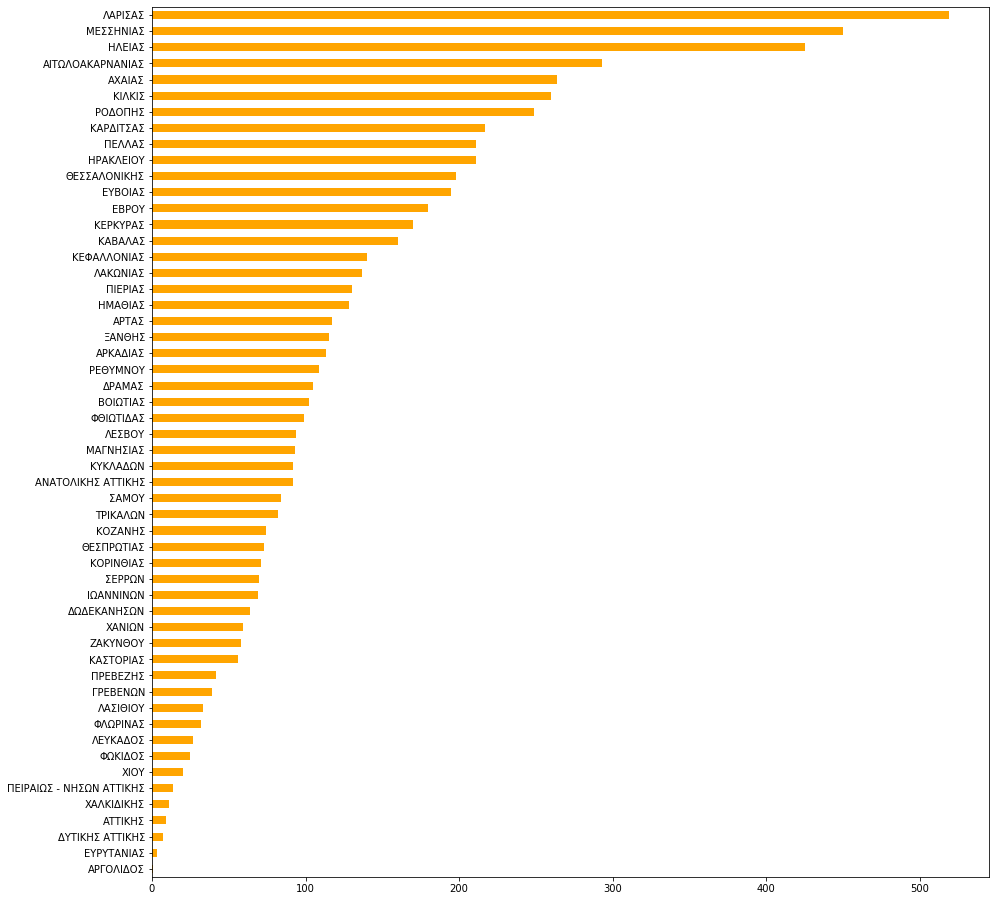

In [98]:
df2.region.value_counts().iloc[::-1].plot(kind='barh',figsize=(15,16), color='orange')
plt.savefig(("Total_fires_per_region.pdf"), bbox_inches='tight')

## Number of total firefight personnel used, per region

In [99]:
df2.groupby('region').total_firefight_personnel.sum().sort_values(ascending=False)

region
ΗΛΕΙΑΣ                      3110
ΕΥΒΟΙΑΣ                     2526
ΜΕΣΣΗΝΙΑΣ                   2406
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ            1759
ΛΑΡΙΣΑΣ                     1479
ΑΧΑΙΑΣ                      1415
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ          1374
ΘΕΣΣΑΛΟΝΙΚΗΣ                1271
ΗΡΑΚΛΕΙΟΥ                   1170
ΛΑΚΩΝΙΑΣ                    1118
ΕΒΡΟΥ                       1094
ΚΕΡΚΥΡΑΣ                    1022
ΚΕΦΑΛΛΟΝΙΑΣ                  939
ΑΤΤΙΚΗΣ                      938
ΚΙΛΚΙΣ                       937
ΚΟΡΙΝΘΙΑΣ                    859
ΑΡΚΑΔΙΑΣ                     833
ΡΟΔΟΠΗΣ                      755
ΣΑΜΟΥ                        750
ΧΑΝΙΩΝ                       747
ΛΕΣΒΟΥ                       728
ΜΑΓΝΗΣΙΑΣ                    727
ΔΩΔΕΚΑΝΗΣΩΝ                  724
ΙΩΑΝΝΙΝΩΝ                    650
ΑΡΤΑΣ                        629
ΡΕΘΥΜΝΟΥ                     611
ΚΥΚΛΑΔΩΝ                     601
ΦΘΙΩΤΙΔΑΣ                    550
ΚΑΡΔΙΤΣΑΣ                    548
ΞΑΝΘΗΣ                       537
ΚΟΖ

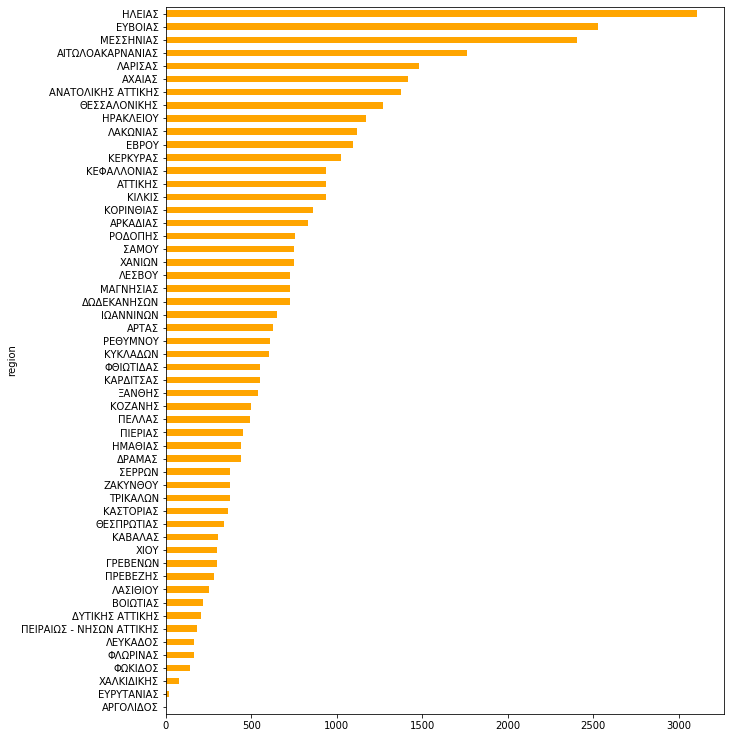

In [100]:
df2.groupby('region').total_firefight_personnel.sum().sort_values(ascending=False).iloc[::-1].plot(kind='barh',figsize=(10,13), color='orange')

## Top 5 fires where large number of firefight personel was used!

In [101]:
df2.sort_values(by ='total_firefight_personnel', ascending=False).head(5)

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
29,31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00.000000000,48.666667,12500,792,84,0
5379,6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00.000000000,9.208333,5800,599,118,12
5049,6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00.000000000,10.083333,10000,218,38,9
5816,6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00.000000000,6.041667,1450,210,51,7
3809,4313,Π.Κ. ΘΕΡΜΟΥ,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,Δ. ΘΕΡΜΟΥ,2018-09-05 14:20:00,2018-09-08 21:00:00,3 days 06:40:00.000000000,3.250000,25,203,19,1


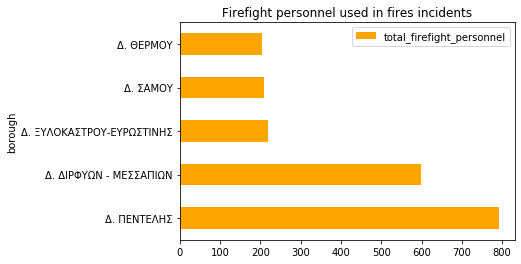

In [102]:
df2.sort_values(by ='total_firefight_personnel',ascending=False)[:5].plot(x='borough', y='total_firefight_personnel', kind='barh', color='orange',
                                                title = 'Firefight personnel used in fires incidents')

## Number of total burned acres per region

In [103]:
acr_burned = df2.groupby('region').total_burned_acres.sum().sort_values(ascending=False)
acr_burned

region
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ             50695
ΛΑΡΙΣΑΣ                     24079
ΑΤΤΙΚΗΣ                     12535
ΚΥΚΛΑΔΩΝ                    10421
ΚΟΡΙΝΘΙΑΣ                   10117
ΕΥΒΟΙΑΣ                      7614
ΚΙΛΚΙΣ                       6908
ΗΛΕΙΑΣ                       5226
ΧΑΝΙΩΝ                       3499
ΘΕΣΣΑΛΟΝΙΚΗΣ                 3203
ΣΕΡΡΩΝ                       2638
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ           2216
ΚΟΖΑΝΗΣ                      1939
ΚΑΡΔΙΤΣΑΣ                    1915
ΚΕΦΑΛΛΟΝΙΑΣ                  1880
ΞΑΝΘΗΣ                       1566
ΡΟΔΟΠΗΣ                      1561
ΣΑΜΟΥ                        1505
ΒΟΙΩΤΙΑΣ                     1392
ΦΛΩΡΙΝΑΣ                     1313
ΠΙΕΡΙΑΣ                      1140
ΔΡΑΜΑΣ                       1131
ΜΕΣΣΗΝΙΑΣ                    1106
ΕΒΡΟΥ                        1071
ΛΑΚΩΝΙΑΣ                      981
ΚΑΣΤΟΡΙΑΣ                     940
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ              902
ΤΡΙΚΑΛΩΝ                      807
ΗΡΑΚΛΕΙΟΥ                     787
ΜΑΓΝΗΣΙ

In [112]:
acr_burned2 = acr_burned.reset_index().rename(columns={acr_burned.index.name:'region'})
acr_burned2


,region,total_burned_acres
0,ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,50695
1,ΛΑΡΙΣΑΣ,24079
2,ΑΤΤΙΚΗΣ,12535
3,ΚΥΚΛΑΔΩΝ,10421
4,ΚΟΡΙΝΘΙΑΣ,10117
5,ΕΥΒΟΙΑΣ,7614
6,ΚΙΛΚΙΣ,6908
7,ΗΛΕΙΑΣ,5226
8,ΧΑΝΙΩΝ,3499
9,ΘΕΣΣΑΛΟΝΙΚΗΣ,3203


In [114]:
acr_burned2.dtypes

region                object
total_burned_acres     int64
dtype: object

In [115]:
acr_burned2.to_csv('acres_burned.csv')

## Top 5 cases with most acres burned 

In [47]:
df2.sort_values(by ='total_burned_acres', ascending=False).head(5)

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
36,41,Π.Υ. ΜΕΓΑΡΩΝ,ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00.000000000,10.291667,50650,117,53,28
29,31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00.000000000,48.666667,12500,792,84,0
5049,6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00.000000000,10.083333,10000,218,38,9
5379,6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00.000000000,9.208333,5800,599,118,12
5560,6605,Π.Κ. ΠΑΡΟΥ,ΚΥΚΛΑΔΩΝ,Δ. ΠΑΡΟΥ,2018-07-31 16:42:00,2018-08-09 07:50:00,8 days 15:08:00.000000000,8.625000,4000,79,17,4


## Average acres burned per fire per region

In [48]:
avg_per_fire_per_region = df2.groupby('region').total_burned_acres.mean().round(2).sort_values(ascending=False)
avg_per_fire_per_region

region
ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ             7242.14
ΑΤΤΙΚΗΣ                     1392.78
ΚΟΡΙΝΘΙΑΣ                    142.49
ΚΥΚΛΑΔΩΝ                     113.27
ΧΑΝΙΩΝ                        59.31
ΛΑΡΙΣΑΣ                       46.39
ΦΛΩΡΙΝΑΣ                      41.03
ΕΥΒΟΙΑΣ                       39.05
ΣΕΡΡΩΝ                        37.69
ΚΙΛΚΙΣ                        26.57
ΚΟΖΑΝΗΣ                       26.20
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ            24.09
ΣΑΜΟΥ                         17.92
ΚΑΣΤΟΡΙΑΣ                     16.79
ΘΕΣΣΑΛΟΝΙΚΗΣ                  16.18
ΒΟΙΩΤΙΑΣ                      13.65
ΞΑΝΘΗΣ                        13.62
ΚΕΦΑΛΛΟΝΙΑΣ                   13.43
ΗΛΕΙΑΣ                        12.30
ΔΡΑΜΑΣ                        10.77
ΤΡΙΚΑΛΩΝ                       9.84
ΖΑΚΥΝΘΟΥ                       9.53
ΓΡΕΒΕΝΩΝ                       8.92
ΚΑΡΔΙΤΣΑΣ                      8.82
ΠΙΕΡΙΑΣ                        8.77
ΦΩΚΙΔΟΣ                        8.64
ΜΑΓΝΗΣΙΑΣ                      8.30
ΧΙΟΥ                 

## Top 5 cases of terrestial forces needed 

In [49]:
df2.sort_values(by ='total_terrestrial_forces', ascending=False).head(5) 

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
5379,6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00.000000000,9.208333,5800,599,118,12
29,31,12ος Π.Σ. ΑΘΗΝΩΝ,ΑΤΤΙΚΗΣ,Δ. ΠΕΝΤΕΛΗΣ,2018-07-23 16:49:00,2018-09-10 09:04:00,48 days 16:15:00.000000000,48.666667,12500,792,84,0
5346,6376,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-06-01 15:25:00,2018-06-10 18:50:00,9 days 03:25:00.000000000,9.125000,440,141,54,4
36,41,Π.Υ. ΜΕΓΑΡΩΝ,ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00.000000000,10.291667,50650,117,53,28
5816,6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00.000000000,6.041667,1450,210,51,7


## Top 5 cases of aerial forces needed 

In [50]:
df2.sort_values(by ='total_aerial_forces', ascending=False).head(5) 

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
36,41,Π.Υ. ΜΕΓΑΡΩΝ,ΔΥΤΙΚΗΣ ΑΤΤΙΚΗΣ,Δ. ΜΕΓΑΡΕΩΝ,2018-07-23 12:03:00,2018-08-02 19:30:00,10 days 07:27:00.000000000,10.291667,50650,117,53,28
5379,6409,Π.Υ. ΧΑΛΚΙΔΑΣ,ΕΥΒΟΙΑΣ,Δ. ΔΙΡΦΥΩΝ - ΜΕΣΣΑΠΙΩΝ,2018-08-12 15:07:00,2018-08-21 20:38:00,9 days 05:31:00.000000000,9.208333,5800,599,118,12
5049,6065,Π.Υ. ΣΥΚΙΩΝΟΣ - ΚΙΑΤΟΥ,ΚΟΡΙΝΘΙΑΣ,Δ. ΞΥΛΟΚΑΣΤΡΟΥ-ΕΥΡΩΣΤΙΝΗΣ,2018-07-23 17:20:00,2018-08-02 20:00:00,10 days 02:40:00.000000000,10.083333,10000,218,38,9
4567,5277,Π.Υ. ΚΑΛΑΜΑΤΑΣ,ΜΕΣΣΗΝΙΑΣ,Δ. ΚΑΛΑΜΑΤΑΣ,2018-09-08 17:10:00,2018-09-13 13:25:00,4 days 20:15:00.000000000,4.833333,60,62,25,9
5816,6881,Π.Υ. ΣΑΜΟΥ,ΣΑΜΟΥ,Δ. ΣΑΜΟΥ,2018-09-08 20:27:00,2018-09-14 22:00:00,6 days 01:33:00.000000000,6.041667,1450,210,51,7


## Terrestial and aerial forces where used in top 5 cases of most acres burned (1) 

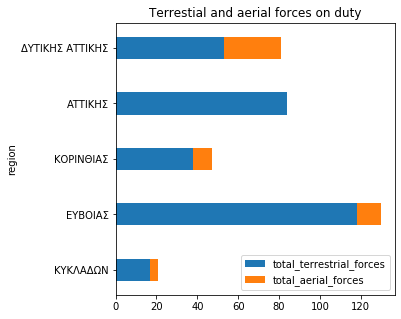

In [51]:
df2.sort_values(by ='total_burned_acres', ascending=False).head(5)[::-1].plot(x='region', 
        y=['total_terrestrial_forces', 'total_aerial_forces'], 
        kind='barh', 
        stacked=True,
        figsize=(5,5),
        width=0.4,
        title="Terrestial and aerial forces on duty")

## Terrestial and aerial forces where used in top 5 cases of most acres burned (2) - Not Good

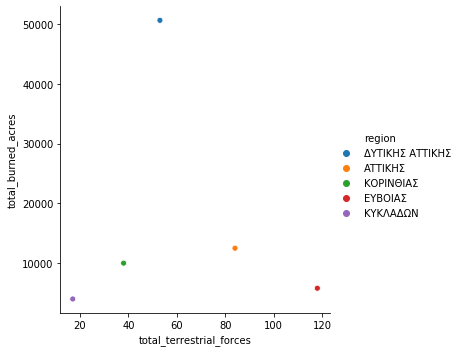

In [52]:
sns.relplot(data=df2.sort_values(by ='total_burned_acres', ascending=False).head(5), 
            x='total_terrestrial_forces', y='total_burned_acres', hue='region')

## Terrestial and aerial forces where used in top 5 cases of most acres burned (3) 

[]

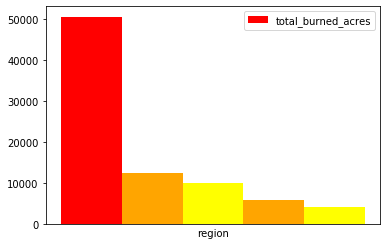

In [53]:
colors = ['red', 'orange', 'yellow', 'orange', 'yellow']

ax = df2.sort_values(by ='total_burned_acres', ascending=False).head(5) \
    .plot(x='region', y='total_burned_acres', kind='bar', width=1, color=colors)

ax.set_xticks([])

## Top 5 worst cases in terms of wait days (Fail because of wrongful import of data by the source. e.g. 10/6/2018 and then 6/10/2018 

In [54]:
df2.sort_values(by ='wait_days', ascending=False).head(5)

,Unnamed: 0,Fire_department,region,borough,start_daytime,end_daytime,difference,wait_days,total_burned_acres,total_firefight_personnel,total_terrestrial_forces,total_aerial_forces
6139,7317,Π.Υ. ΡΕΘΥΜΝΗΣ,ΡΕΘΥΜΝΟΥ,Δ. ΡΕΘΥΜΝΗΣ,2018-06-10 07:50:00,2018-10-06 10:55:00,118 days 03:05:00.000000000,118.125000,0,0,0,0
3568,4063,Π.Υ. ΑΙΓΙΟΥ,ΑΧΑΙΑΣ,Δ. ΑΙΓΙΑΛΕΙΑΣ,2018-09-12 09:08:00,2018-12-13 10:33:00,92 days 01:25:00.000000000,92.041667,1,14,8,0
3569,4064,Π.Υ. ΑΙΓΙΟΥ,ΑΧΑΙΑΣ,Δ. ΑΙΓΙΑΛΕΙΑΣ,2018-09-12 14:20:00,2018-12-13 10:33:00,91 days 20:13:00.000000000,91.833333,0,6,5,0
2387,2740,Π.Κ. ΑΝΩ ΑΘΑΜΑΝΙΟΥ,ΑΡΤΑΣ,Δ. ΚΕΝΤΡΙΚΩΝ ΤΖΟΥΜΕΡΚΩΝ,2018-04-15 22:42:00,2018-07-15 23:40:00,91 days 00:58:00.000000000,91.000000,0,3,1,0
6590,7875,Π.Κ. ΛΗΞΟΥΡΙΟΥ,ΚΕΦΑΛΛΟΝΙΑΣ,Δ. ΚΕΦΑΛΛΟΝΙΑΣ,2018-04-07 17:10:00,2018-07-04 20:00:00,88 days 02:50:00.000000000,88.083333,3,5,3,0
